<a href="https://colab.research.google.com/github/WaithiraHawi/Customer_Lifetime_Value/blob/main/CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   object 
 1   purchase_history  1000 non-null   int64  
 2   tenure            1000 non-null   int64  
 3   total_spent       1000 non-null   float64
 4   CLV               1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB
None

Summary Statistics:
       purchase_history       tenure  total_spent           CLV
count       1000.000000  1000.000000   1000.00000   1000.000000
mean          25.379000    30.382000   5000.45640  12535.156530
std           14.122138    16.923371   2823.52985  10837.411055
min            1.000000     1.000000    101.87000     49.710000
25%           13.000000    15.750000   2441.86750   3366.300000
50%           26.000000    31.000000   5048.90500   9498.365000
75%           3

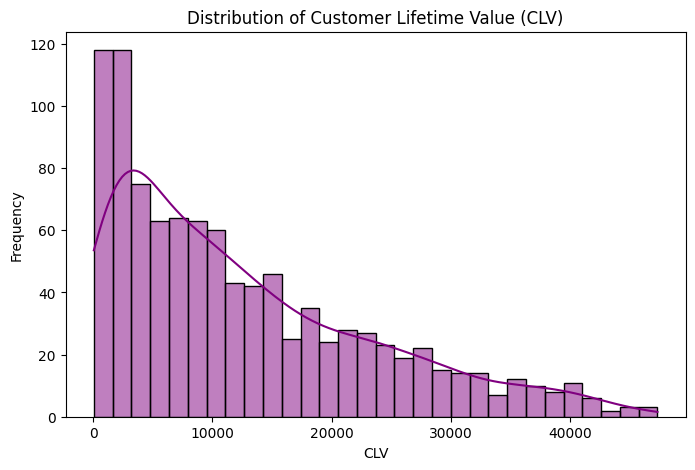

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/21_customer_lifetime_value.csv")

print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

#Distribution of CLV

plt.figure(figsize=(8,5))
sns.histplot(df['CLV'], bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()


Top 10 Customers by CLV:
    customer_id       CLV
757       C1757  47359.42
565       C1565  46383.98
52        C1052  45943.71
15        C1015  45027.50
408       C1408  44798.67
964       C1964  44632.12
763       C1763  43414.98
81        C1081  43181.40
132       C1132  42451.81
450       C1450  42272.48

Bottom 10 Customers by CLV:
    customer_id     CLV
427       C1427   49.71
380       C1380   64.16
923       C1923   65.12
965       C1965   68.29
41        C1041  130.90
960       C1960  137.79
39        C1039  161.34
420       C1420  196.42
340       C1340  198.83
11        C1011  204.94


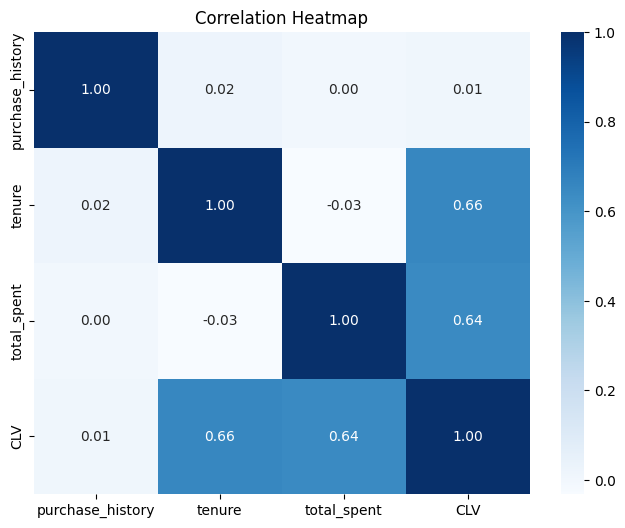

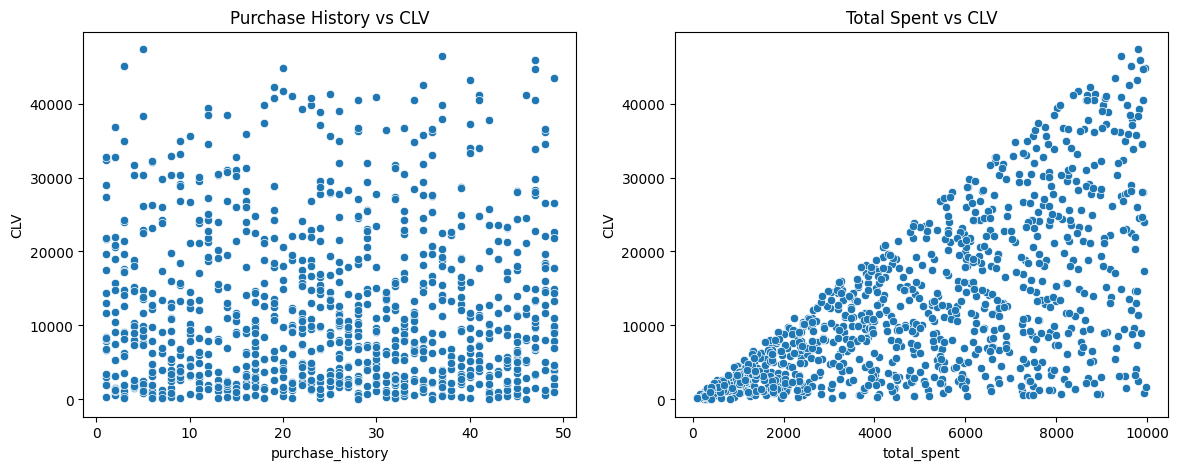

/tmp/ipython-input-2706011753.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLV_Segment', data=df, palette='Set2')


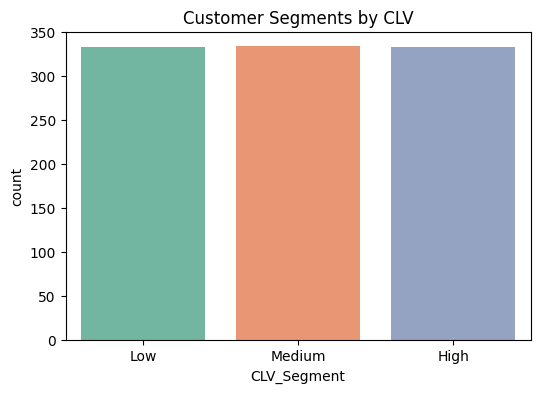


Segment Counts:
CLV_Segment
Medium    334
Low       333
High      333
Name: count, dtype: int64

Segment Summary (Mean Values):
             purchase_history     tenure  total_spent           CLV
CLV_Segment                                                        
Low                 25.099099  17.621622  3070.724444   2369.390721
Medium              25.685629  29.703593  4795.585449   9718.917904
High                25.351351  43.822823  7135.674535  25525.618138


/tmp/ipython-input-2706011753.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby('CLV_Segment')[['purchase_history','tenure','total_spent','CLV']].mean()


In [6]:
# Top and Bottom Customers by CLV

top_10 = df.sort_values('CLV', ascending=False).head(10)
bottom_10 = df.sort_values('CLV', ascending=True).head(10)

print("\nTop 10 Customers by CLV:")
print(top_10[['customer_id', 'CLV']])

print("\nBottom 10 Customers by CLV:")
print(bottom_10[['customer_id', 'CLV']])


# Correlation Analysis

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for numeric relationships
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.scatterplot(x='purchase_history', y='CLV', data=df, ax=axes[0])
axes[0].set_title('Purchase History vs CLV')

sns.scatterplot(x='total_spent', y='CLV', data=df, ax=axes[1])
axes[1].set_title('Total Spent vs CLV')

plt.show()

# CLV Segmentation
# Segmenting customers into Low, Medium, High CLV safely
df['CLV_Segment'] = pd.qcut(df['CLV'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

plt.figure(figsize=(6,4))
sns.countplot(x='CLV_Segment', data=df, palette='Set2')
plt.title('Customer Segments by CLV')
plt.show()

print("\nSegment Counts:")
print(df['CLV_Segment'].value_counts())

# Average stats per segment
segment_summary = df.groupby('CLV_Segment')[['purchase_history','tenure','total_spent','CLV']].mean()
print("\nSegment Summary (Mean Values):")
print(segment_summary)

In [13]:
# Predictive model with random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("/content/21_customer_lifetime_value.csv")

# Features & Target
X = df[['purchase_history', 'tenure', 'total_spent']]
y = df['CLV']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 576.4058478989044
R² Score: 0.9974352689620924


In [19]:
import joblib
joblib.dump(model, "clv_predictor.pkl")

['clv_predictor.pkl']

In [26]:
# Marketing campaigns
# Segment customers
df['CLV_Segment'] = pd.qcut(df['CLV'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

# Defining Campaigns
def campaign_strategy(segment):
    if segment == 'High':
        return 'VIP Loyalty Program - Exclusive Offers'
    elif segment == 'Medium':
        return 'Upsell & Cross-sell with Discounts'
    else:
        return 'Reactivation Campaign with Welcome Coupons'

df['Marketing_Campaign'] = df['CLV_Segment'].apply(campaign_strategy)

print(df[['customer_id', 'CLV', 'CLV_Segment', 'Marketing_Campaign']].head())

  customer_id       CLV CLV_Segment  \
0       C1000   3427.80         Low   
1       C1001  25670.04        High   
2       C1002  10635.08      Medium   
3       C1003  21381.27        High   
4       C1004   1526.96         Low   

                           Marketing_Campaign  
0  Reactivation Campaign with Welcome Coupons  
1      VIP Loyalty Program - Exclusive Offers  
2          Upsell & Cross-sell with Discounts  
3      VIP Loyalty Program - Exclusive Offers  
4  Reactivation Campaign with Welcome Coupons  
